# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# K-means Functions

Centroid - average of all points in cluster

In [10]:
def updateCentroids(points, centroids, clusters):
    # define empty list to store new cluster centroid coordinates
    new_centroids = []

    for cluster in range(len(centroids)):
        # create empty lists to store x and y coordinates for each point in cluster
        x_pnts = []
        y_pnts = []
        
        for i in range(len(clusters)):
            # append coordinates to x and y lists if in cluster
            if clusters[i] == int(cluster):
                x_pnts.append(points[i][0])
                y_pnts.append(points[i][1])
        # calc average x and y points for cluster
        x_avg = sum(x_pnts)/len(x_pnts)
        y_avg = sum(y_pnts)/len(y_pnts)
        new_centroids.append([x_avg, y_avg])
    # update centroid coordinates
    return(np.array(new_centroids))

Calculate euclidean distance

In [12]:
def distance(A, B):
    squares = [(a - b)**2 for a, b in zip(A, B)]
    return sum(squares)**0.5

For each point, find the distance to all centroids and assign it to the closest one

In [13]:
def assignPoints(points, centroids, clusters):
    # iterate through all points
    for j in range(len(points)):
        # define blank dictionary for point
        clust_dist = {}
        # iterate through all cluster centroids
        for i in range(len(centroids)):
            # update dictionary with distance between point and cluster centroid
            clust_dist[i] = distance(points[j], centroids[i])
        # assign point to cluster with miniumum distance
        clusters[j] = min(clust_dist.keys(), key=(lambda k: clust_dist[k]))
    return(clusters)

# K-means Example

In [2]:
# generate random points
points = np.random.rand(100, 2)

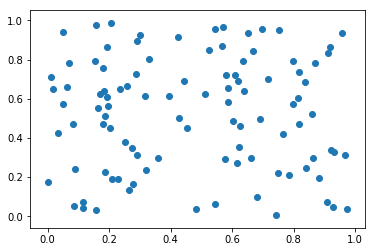

In [3]:
plt.scatter(points[:, 0], points[:, 1]);

In [4]:
k = 5

## Initial clustering

In [5]:
clusters = np.zeros(len(points))
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
centroids = deepcopy(points[:k])
centroids

array([[0.62239285, 0.35358256],
       [0.6184078 , 0.68909424],
       [0.15869141, 0.97433931],
       [0.20378324, 0.44923442],
       [0.05025161, 0.93947129]])

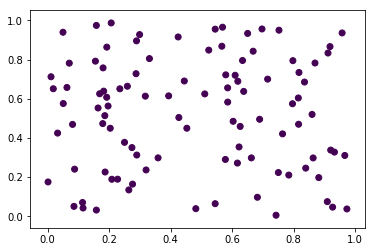

In [7]:
plt.scatter(points[:, 0], points[:, 1], c=clusters);

In [9]:
new_centroids = []

In [ ]:


for cluster in range(len(centroids)):
    # create empty lists to store x and y coordinates for each point in cluster
    x_pnts = []
    y_pnts = []

    for i in range(len(clusters)):
        # append coordinates to x and y lists if in cluster
        if clusters[i] == int(cluster):
            x_pnts.append(points[i][0])
            y_pnts.append(points[i][1])
        else:
            pass
    # calc average x and y points for cluster
    x_avg = sum(x_pnts)/len(x_pnts)
    y_avg = sum(y_pnts)/len(y_pnts)
    new_centroids.append([x_avg, y_avg])
# update centroid coordinates
centroids = np.array(new_centroids)

In [ ]:
def updateCentroids(points, centroids, clusters):
    # define empty list to store new cluster centroid coordinates
    new_centroids = []

    for cluster in range(len(centroids)):
        # create empty lists to store x and y coordinates for each point in cluster
        x_pnts = []
        y_pnts = []
        
        for i in range(len(clusters)):
            # append coordinates to x and y lists if in cluster
            if clusters[i] == int(cluster):
                x_pnts.append(points[i][0])
                y_pnts.append(points[i][1])
            else:
                pass
        # calc average x and y points for cluster
        x_avg = sum(x_pnts)/len(x_pnts)
        y_avg = sum(y_pnts)/len(y_pnts)
        new_centroids.append([x_avg, y_avg])
    # update centroid coordinates
    centroids = np.array(new_centroids)
    return(centroids)

## Cluster modeling

In [14]:
clusters = assignPoints(points, centroids, clusters)
clusters

array([0., 1., 2., 3., 4., 0., 3., 0., 3., 1., 0., 1., 0., 3., 1., 3., 1.,
       0., 1., 3., 1., 3., 4., 0., 1., 1., 3., 2., 0., 3., 1., 3., 3., 3.,
       0., 0., 1., 1., 1., 3., 1., 0., 3., 3., 3., 0., 1., 4., 0., 0., 1.,
       3., 0., 4., 0., 1., 3., 2., 1., 0., 1., 1., 3., 0., 3., 3., 0., 1.,
       0., 3., 2., 0., 0., 3., 3., 2., 2., 1., 0., 1., 3., 1., 2., 3., 3.,
       1., 2., 3., 0., 1., 1., 3., 3., 3., 0., 3., 3., 0., 1., 2.])

In [15]:
centroids = updateCentroids(points, centroids, clusters)
centroids

array([[0.74946599, 0.26990987],
       [0.67862503, 0.76997275],
       [0.26337605, 0.87261036],
       [0.18736153, 0.38522018],
       [0.07196298, 0.80624793]])

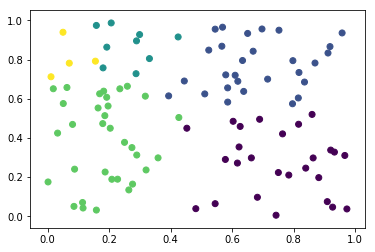

In [16]:
plt.scatter(points[:, 0], points[:, 1], c=clusters);

# Sklearn K-means

In [2]:
from sklearn.cluster import KMeans

## Find optimal k value

In [22]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    Sum_of_squared_distances.append(km.inertia_)

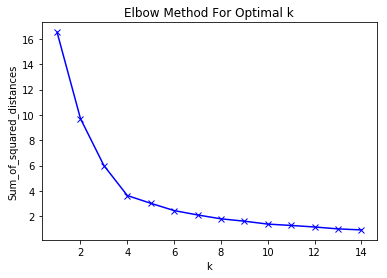

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
best_k = 5
km = KMeans(n_clusters=best_k)
km.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

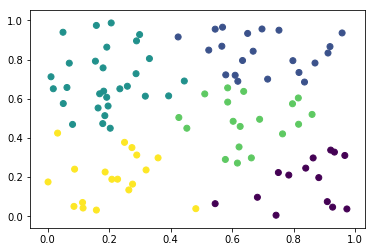

In [39]:
plt.scatter(points[:, 0], points[:, 1], c=km.labels_);